# 탄소 중립을 위한 기후 기술 정보 시각화
###### 발표자 : 조인환
>탄소 중립이란? 인간의 활동에 의한 온실가스 배출을 최대한 줄이고, 남은 온실가스는 흡수, 제거해서 실질적인 배출량을 0으로 만든다는 개념이다.

1. **Intro** : 전 세계는 현재 기후 변화에 대응하기 위해 에너지 사회로의 전환을 목표로 하면서 “기후 기술 개발”을 목표로 하고 있습니다. <br> 
> 따라서, 기후 변화가 어떻게 진행되가는지를 먼저 살펴보고
>>1) 세계 평균 기온 증감량(°C)<br>2) 전세계 국가별 탄소배출량<br> 3) 연도별 탄소배출량
  

2. **Main** : 글로벌 기후 기술 수요와 국내 보유 기술의 매칭 전략 리포트
> 국가에서 분류한 기후 기술 분류 체계를 웹크롤링을 이용하여 분석
>>1) 전세계 국가들이 어떤 기후 기술을 수요하는지<br>2) 연구비& 연구원, 종사자수 비교 그래프<br>3) 매출액, 수출액 비교 그래프 <br>4) 총 매출액 대비 수익 그래프
  
  
3. **Current Trend in this field** : 기후 기술과 관련하여 어떠한 트랜드로 가고있는지 살펴보기
> 기후 기술과 관련된 카테고리의 뉴스 기사를 웹크롤링을 이용하여 분석
>>1) 뉴스 제목에 가장 많이 언급된 단어들을 추출<br>2) 그 단어들이 모두 들어간 기사를 검색, 추출<br>3)워드 클라우드로 살펴보기

4. **Conclusion**
<br>

### Data 출처
- 기후 기술 분류 체계 : https://www.ctis.re.kr/ko/techClass/classification.do?key=1141
- 기후 기술 수요량 : https://www.ctis.re.kr/ko/dmandTchnlgy/dmandTchnlgyList.do?key=1543{%22tchnlgyNm%22:%22%22,%22sclasSn%22:%22%22,%22keyword%22:%22[]%22,%22lang%22:%22ko%22,%22sortOrder%22:%22desc%22,%22total%22:%22%22,%22ltN2Cd%22:%22%22,%22infoPrvd%22:%22%22,%22size%22:%2250%22,%22hasParam%22:true}
- 기후 기술 자료들 : https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_01&vw_cd=MT_ZTITLE&list_id=N2_5&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=B4&path=%252FstatisticsList%252FstatisticsListIndex.do
- 세계 탄소 배출량 : https://ourworldindata.org/
- 기후 기술 뉴스 자료 : https://www.ctis.re.kr/ko/selectBbsNttList.do?key=1692&bbsNo=312&searchBbsType=&searchCtgry=&searchCnd=ADITFIELD2&searchKrwdType=&chgPage=50
- geo.json file : https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json
- 세계 지도 이미지 : https://www.creativefabrica.com/wp-content/uploads/2021/03/09/World-Map-in-Different-Shapes-Graphics-9396076-2-580x385.jpg

### 모듈 불러오기

In [52]:
import pandas as pd
import numpy as np
import re
from collections import Counter # 개수 세는 함수
import plotly
import plotly.figure_factory as ff # 표 그리는 함수
import plotly.graph_objects as go # 표 그리는 함수
from plotly import express as px
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
from selenium import webdriver
from selenium.webdriver.common.by import By
from wordcloud import WordCloud 
from io import BytesIO #이미지 읽는 함수
import requests #url의 소스 따오는 함수
import geopandas as gpd #지도 그리는 함수
import chart_studio 
import chart_studio.plotly as py #plotly파일을 주피터 노트북 이외의 환경에서 열 수 있게 만드는 모듈
import folium
from folium.plugins import MarkerCluster #지도
import json
import warnings
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import os #이미지 따오는 함수
from PIL import Image #이미지 삽입하는 함수
from IPython.display import display, HTML #주피터 노트북 화면 확장해주는 함수
warnings.filterwarnings(action='ignore') # 경고(엑셀 불러오기 시 스타일 없다는 문구) 제거
display(HTML("<style>.container { width:90% !important; }</style>"))  # 주피터 노트북 화면 늘리기

In [50]:
# Plotly API keys
username = 'InhwanCho'
api_key = '2rcpT6kMscftHvuLE3Mb'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

### 기후 변화 - 탄소 중립의 필요성

### 세계 평균 기온 증감(°C)

In [16]:
df10 = pd.read_csv('../../Downloads/modeul/temperature-anomaly.csv')

In [17]:
filt = df10['Entity'] == 'Global'
df10 = df10.loc[filt]

In [65]:
x = df10['Year']
y = df10['Median temperature anomaly from 1961-1990 average']
y_upper = df10['Upper bound (95% CI)']
y_lower = df10['Lower bound (95% CI)']
y_zeros = [z for z in np.zeros(len(x))]

fig = go.Figure([
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',text ='평균 기온 증감',name = '전세계 평균 기온 증감 °C'
    ),
    go.Scatter(
        name='Upper bound (95% CI)',
        x=x,
        y=y_upper,
        mode='lines',
        marker=dict(color='#444'),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower bound (95% CI)',
        x=x,
        y=y_lower,
        marker=dict(color='#444'),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False),
    go.Scatter(x = x, y = y_zeros, 
               mode='lines', name = '0 Line')
])

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Median temperature',
    title='세계 평균 기온 증감 °C',
    hovermode='x'
)
fig.update_yaxes(rangemode='tozero')

In [66]:
py.plot(fig, filename = '세계 평균 기온 증감(°C)', auto_open=True)

'https://plotly.com/~InhwanCho/14/'

### 세계 국가별 탄소배출량

In [22]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

dd = pd.read_csv('../../Downloads/modeul/annual-co2-emissions-per-country.csv')

countries.rename(columns={'name':'Entity'},inplace=True)

# merge_outer = pd.merge(df1,df2, how='outer',on='id')
d = pd.merge(dd,countries, how='outer', on='Entity')

filt = (d['Year'] ==2020) & (d['geometry'] != None)

a = d.loc[filt,['Entity','Annual CO2 emissions','geometry']]
a.rename(columns={'Annual CO2 emissions':'emissions'},inplace=True)

countries = pd.merge(countries,a,on='Entity',how='outer')

countries = countries.drop(columns='geometry_y')

countries.rename(columns={'geometry_x' : 'geometry'},inplace=True)

filt = countries['emissions'] > countries['emissions'].quantile(0.6)
countries_filt = countries.loc[filt,['continent','Entity','iso_a3','emissions','geometry']]

[]

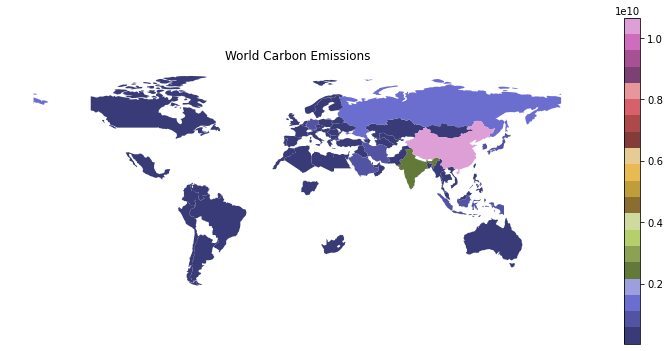

In [6]:
ax = countries_filt.plot(column='emissions', legend=True,figsize=(13,6),cmap="tab20b")
ax.set_axis_off()
ax.set_title("World Carbon Emissions")
ax.plot() 
### 중국이 너무 탄소배출량 자체가 압도적 -> 국가 인구별 탄소배출량 시각화 필요

### 연간 탄소 배출량을 StackPlot으로 시각화

In [23]:
df6 = pd.read_csv('../../Downloads/modeul/annual-co-emissions-by-region.csv')

In [24]:
#stack할 국가들을 나누는 작업
year = np.unique(df6['Year'].values)
chi = (df6[df6['Entity']=="China"]['Annual CO2 emissions (zero filled)'])
usa = (df6[df6['Entity']=="United States"]['Annual CO2 emissions (zero filled)'])
afr = (df6[df6['Entity']=="Africa"]['Annual CO2 emissions (zero filled)'])
ind = (df6[df6['Entity']=="India"]['Annual CO2 emissions (zero filled)'])
south_a = (df6[df6['Entity']=="South America"]['Annual CO2 emissions (zero filled)'])
eu = (df6[df6['Entity']=="Europe (excl. EU-27)"]['Annual CO2 emissions (zero filled)'])
ocea = (df6[df6['Entity']=="Oceania"]['Annual CO2 emissions (zero filled)'])
# chi, usa, afr, ind, south_a, eu27, ocea

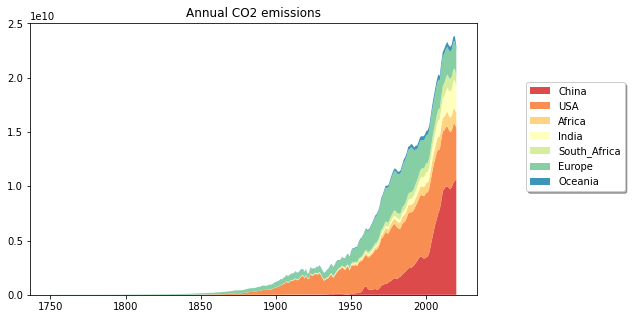

In [9]:
plt.figure(figsize=(8,5))
palette = sns.color_palette("Spectral", 7).as_hex()
colors = ','.join(palette)
labels = ["China", "USA", "Africa", "India", "South_Africa", "Europe", "Oceania"]
plt.stackplot(year, chi, usa, afr, ind, south_a, eu, ocea, labels=labels, colors=colors)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.8), shadow=True)
plt.title('Annual CO2 emissions')
plt.show()

### 세계 국가 인구별 탄소 배출량 도식화

In [25]:
df7 = pd.read_csv('../../Downloads/modeul/co-emissions-per-capita.csv')

In [26]:
filt = df7['Year'] == 2020
df7 = df7.loc[filt,['Entity','Annual CO2 emissions (per capita)']]

In [27]:
url_geo = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
# geo.json파일 보단 url을 선호해서 url스타일로 해봤습니다
world_map = folium.Map(location = [37.63772494531694, 24.785517601541628], zoom_start = 2,
               max_bounds = True, 
               min_zoom = 2, min_lat = -84, 
               max_lat = 84, min_lon = -175, max_lon = 187)  #뼈대맵 작성
cp = folium.Choropleth(  # 농도별 색상으로 나타냄
    geo_data=url_geo,
    data = df7, columns = ['Entity','Annual CO2 emissions (per capita)'], key_on = 'properties.name',
    name="choropleth",
    fill_color="RdYlGn",
    fill_opacity=0.7,
    line_opacity=0.5,
    highlight=True,
    legend_name="Annual CO2 emissions (per capita)",
    ).add_to(world_map)

cp.geojson.data['features'][-10]['properties']['name'] = 'United States' # 미국이름이 독특하게 등록되어있어 변경
df7_a = df7.set_index('Entity') # index를 국가명으로 하여 코드 간결화

for i in cp.geojson.data['features']:   # geo.json파일이 url이라 str취급되어 geojson파일의 data형식으로 변경
    try:  #나라 이름에 해당 안되는 경우 KeyError가 발생하여 국가명만 추출
        i['properties']['Annual CO2 emissions (per capita)'] = df7_a.loc[i['properties']['name'],'Annual CO2 emissions (per capita)'] 
        # geojson파일에 keys, values 추가
    except KeyError:  
        continue

folium.GeoJsonTooltip(['name','Annual CO2 emissions (per capita)']).add_to(cp.geojson) # choropleth(색상그림에 툴팁 추가)

folium.LayerControl().add_to(world_map)
world_map.save("세계 국가 인구별 탄소 배출량 도식화.html")
world_map

### 1인당 GDP가 높은 국가와 탄소 배출량의 상관 분석 

Year                                                        NaN
GDP per capita, PPP (constant 2017 international $)    0.616106
Annual CO2 emissions (per capita)                      1.000000
dtype: float64

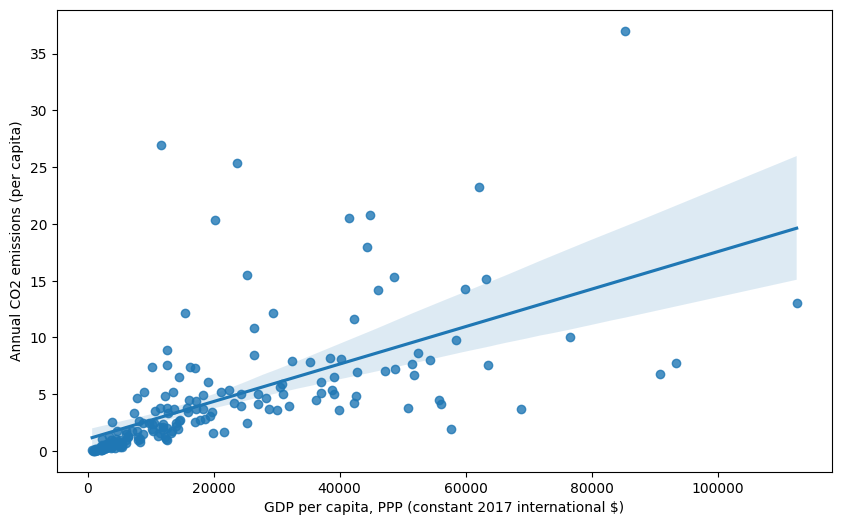

In [30]:
df8 = pd.read_csv('../../Downloads/modeul/co2-emissions-and-gdp-per-capita.csv')

df8= df8.loc[df8['Year']==2020]

df8.drop(columns='Annual consumption-based CO2 emissions (per capita)',inplace=True)

plt.figure(figsize=(10,6))
sns.regplot(data = df8, x='GDP per capita, PPP (constant 2017 international $)',y = 'Annual CO2 emissions (per capita)')
df8.corrwith(df8['Annual CO2 emissions (per capita)'])
# 상관계수 = 0.616106 으로 높은 편이다. 
# -> 잘 사는 국가가 높은 탄소 배출량을 보여주는 경향이 있다.

>상관계수 => 0.616106 으로 높은 편이다. 
>    > 잘 사는 국가가 높은 탄소 배출량을 보여주는 경향이 있다. <br>
>    > 중국이 세계 탄소배출량의 절반을 차지하고있다. <br>
>    > 탄소 배출량을 줄여야 한다.(기후 기술이 필요함)

### 기후 기술 분류 체계를 (대분류 - 중분류 - 소분류로 분류) - 웹크롤링

In [31]:
# 대분류 - 중분류 - 소분류로 표 분류작업 > urlopen으로 분류

url = 'https://www.ctis.re.kr/ko/techClass/classification.do?key=1141'

html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')

column1 = (['감축']*22) + (['적응']*18) + (['융복합']*5) #대분류 열 생성

info1 = soup.select('#table_box > table > tbody > tr > td') #중분류 html파일
middle_sort = [] #중분류
for i in range(len(info1)):
    if '(' in info1[i].text:
        middle_sort.append(re.findall('\(..?\) ?[가-힣]+',info1[i].text))

indexnum = [3,8,2,2,2,3,2,4,4,2,3,2,3,5] #중분류 개수 분할
a = []
for i in range(len(indexnum)):
    a.append(middle_sort[i] * indexnum[i])

middle_sort = sum(a, []) #2차원리스트 -> 1차원리스트로 바꿔서 데이터 프레임형식으로 바꿈
df_md = pd.DataFrame(middle_sort)

info = soup.select('td.bgw') #소분류 html파일
reduction = [] #1~22 까지 '감축'으로 분류
adaptation = [] #23~40 까지 '적응'으로 분류
convergence = [] #41~45 까지 '융복합'으로 분류

for i in range(len(info)): 
    if i<22:
        reduction.append(info[i].text.lstrip())
    elif i>21 and i <40:
        adaptation.append(info[i].text.lstrip())
    else:
        convergence.append(info[i].text.lstrip())

df1 = pd.concat([pd.DataFrame(reduction),pd.DataFrame(adaptation),pd.DataFrame(convergence)])  # 소분류 합치기

df = pd.DataFrame(column1,columns=['대분류']) #대분류 데이터프레임 만들기

df['중분류'] =df_md #대분류에 중분류 합치기

df1 = df1.reset_index()

df['소분류'] = df1[0] #대분류,중분류에 소분류까지 추가하기

df = df.reindex(['대분류', '중분류', '소분류'], axis = 1)

df.rename(columns={0:'대분류'},inplace=True)

### 기후 기술 수요량 웹크롤링 

In [34]:
url = 'https://www.ctis.re.kr/ko/dmandTchnlgy/dmandTchnlgyList.do?key=1543#{%22tchnlgyNm%22:%22%22,%22sclasSn%22:%22%22,%22keyword%22:%22[]%22,%22lang%22:%22ko%22,%22sortOrder%22:%22desc%22,%22total%22:%22%22,%22ltN2Cd%22:%22%22,%22infoPrvd%22:%22%22,%22size%22:%2250%22,%22hasParam%22:true}'

driver = webdriver.Chrome('../../Downloads/chromedriver') 

driver.get(url)
time.sleep(1)

In [35]:
total = []
click_list = [3,4,5,6,7,3,4,5,6,7,8,3,4,5,6,7,8,7] #페이지 클릭 순서 리스트
try:
    for i in range(50): #의미없는 숫자 -> except나올때까지 웹크롤링
        time.sleep(1)
        if (i == 4) | (i == 10) | (i == 16) : #다음페이지(' > ') 버튼
            click = driver.find_elements(By.XPATH,'//*[@id="m_content"]/div[9]/div/div[2]/div[2]/div/span[' + str(click_list[i]) + ']/a')
            click[0].click()
            continue
        else:
            html = driver.page_source
            soup = BeautifulSoup(html,'html.parser')
            a = soup.select('#_grid td.jsgrid-cell.jsgrid-align-center')
            time.sleep(1)
            for j in range(len(a)):
                if j%4 == 1 : #1,5,9 ...
                    total.append(a[j].text)

            click = driver.find_elements(By.XPATH,'//*[@id="m_content"]/div[9]/div/div[2]/div[2]/div/span[' + str(click_list[i]) + ']/a')
            click[0].click() #다음페이지
except:
    print('No page')

No page


In [36]:
df['소분류'] = df['소분류'].str[3:] #소분류의 숫자, 공백, &문자를 제거 등 작업하여 열병합을 위한 양식 통일
df['소분류'] = df['소분류'].str.replace('&','·')
df['소분류'] = df['소분류'].str.replace(',','·')
df['소분류'] = df['소분류'].str.replace(' ','')
df['소분류'] = df['소분류'].str.replace('Non-Co2','Non-CO2')

df_web = pd.DataFrame(total)
df_web_val = pd.DataFrame(df_web.value_counts())
df_web_val.rename(columns={0:'기후 기술 수요량'},inplace=True)
df_web_val.reset_index(inplace=True)
df_web_val.rename(columns={0:'소분류'},inplace=True)
df_web_val['소분류'] = df_web_val['소분류'].str.replace(' ','')

df = pd.merge(df,df_web_val,on='소분류',how='outer')
# df['기후 기술 수요'] = df['기후 기술 수요'].fillna(0)  # outer값으로 NaN인 값을 0으로 변경

### 기후 기술 분류 & 기후 기술 수요량 그래프

In [62]:
df['기후 기술 수요량'] = df['기후 기술 수요량'].fillna(0)

fig =  ff.create_table(df)
fig.layout.width=900
fig.show()

In [63]:
py.plot(fig, filename = '기후 기술 분류 & 기후 기술 수요량 그래프(table)', auto_open=True)

'https://plotly.com/~InhwanCho/12/'

In [60]:
fig = px.sunburst(df,
                  path=['대분류', '소분류'],
                  values='기후 기술 수요량',
                  title="기후 기술 분류별 수요량",
                  width=1000, height=750,
                 )
fig.show()

In [61]:
py.plot(fig, filename = '기후 기술 분류 & 기후 기술 수요량 그래프(sunburst)', auto_open=True)

'https://plotly.com/~InhwanCho/10/'

### 기후 기술 데이터 작업 코드

In [43]:
df1 = pd.read_excel('../../Downloads/modeul/기후기술_영역별_기관규모별_매출액_20221005135150.xlsx')
df2 = pd.read_excel('../../Downloads/modeul/기후기술_영역별_기관규모별_수출액_20221005143231.xlsx')
df3 = pd.read_excel('../../Downloads/modeul/기후기술_영역별_기관규모별_연구개발비_20221005143219.xlsx')
df4 = pd.read_excel('../../Downloads/modeul/기후기술_영역별_기관규모별_연구원_수_20221005143206.xlsx')
df5 = pd.read_excel('../../Downloads/modeul/기후기술_영역별_기관규모별_종사자_수_20221005143100.xlsx')

In [44]:
# 데이터프레임 정리
filt = df1['기후기술분류별(2)'].isin(['소계']) #소계 들어있는행만 냅두기
df1 = df1[filt]
filt1 = df1['기후기술분류별(1)'].isin(['합계']) #첫번째 인덱스(분류인덱스) 제거
df1 = df1[~filt1]

filt = df2['기후기술분류별(2)'].isin(['소계']) #소계 들어있는행 제거 필요
df2 = df2[filt]
filt1 = df2['기후기술분류별(1)'].isin(['합계']) #첫번째 인덱스(분류인덱스) 제거
df2 = df2[~filt1]

filt = df3['기후기술분류별(2)'].isin(['소계']) #소계 들어있는행만 냅두기
df3 = df3[filt]
filt1 = df3['기후기술분류별(1)'].isin(['합계']) #첫번째 인덱스(분류인덱스) 제거
df3 = df3[~filt1]

filt = df4['기후기술분류별(2)'].isin(['소계']) #소계 들어있는행만 냅두기
df4 = df4[filt]
filt1 = df4['기후기술분류별(1)'].isin(['합계']) #첫번째 인덱스(분류인덱스) 제거
df4 = df4[~filt1]

filt = df5['기후기술분류별(2)'].isin(['소계']) #소계 들어있는행만 냅두기
df5 = df5[filt]
filt1 = df5['기후기술분류별(1)'].isin(['합계']) #첫번째 인덱스(분류인덱스) 제거
df5 = df5[~filt1]

### 기후기술 영역별 매출액, 수출액 비교 그래프

In [58]:
# 데이터프레임 정리
df1['2020 수출액'] = df2['2020'] 
df1.rename(columns={'기후기술분류별(1)' : '기후 기술 분류', '2020' : '2020 국내 매출액'},inplace=True)
df1 = df1[['기후 기술 분류','2020 국내 매출액', '2020 수출액']]

# 테이블 생성(표)
fig = ff.create_table(df1, height_constant=60)

# 데이터
x_axis = df1['기후 기술 분류']
y1_axis = df1['2020 국내 매출액']
y2_axis = df1['2020 수출액']

# 바 그래프 생성
trace1 = go.Bar(x=x_axis, y=y1_axis, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='2020 국내 매출액 ')
trace2 = go.Bar(x=x_axis, y=y2_axis, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='2020 수출액')

# 바 그래프 합치기
fig.add_traces([trace1, trace2])
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': '단위 (1백만)'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': '2020년 기후 기술 매출액, 수출액 비교'})

fig.layout.update({'height':800})

# Plot!
fig.show()

In [59]:
py.plot(fig, filename = '기후기술영역별 매출액, 수출액 비교 그래프', auto_open=True)

'https://plotly.com/~InhwanCho/8/'

### 기후기술 영역별 연구비& 연구원, 종사자수 비교 그래프 

In [46]:
#데이터프레임 정리
df3['연구원_수'] = df4['2020']
df3['종사자_수'] = df5['2020']
df3.rename(columns = {'기후기술분류별(1)' : '기후 기술 분류', '2020' : '연구개발비'},inplace=True)
df3 = df3[['기후 기술 분류', '연구개발비', '연구원_수', '종사자_수']]

# 테이블 생성(표)
fig = ff.create_table(df3, height_constant=60)

# Add graph data
x_axis = df3['기후 기술 분류']
y1_axis = df3['연구원_수']
y2_axis = df3['종사자_수']
y3_axis = (df3['연구개발비']/50) # 스케일이 너무 커서 1/50로 줄임

# 바 그래프 생성
trace1 = go.Bar(x=x_axis, y=y1_axis, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='2020 연구원_수 ')
trace2 = go.Bar(x=x_axis, y=y2_axis, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='2020 종사자_수')
trace3 = go.Line(x=x_axis, y= y3_axis,
                  xaxis='x2', yaxis='y2', name = '2020 연구개발비 1/50 scale')
               
# 데이터 합치기
fig.add_traces([trace1, trace2, trace3])
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': '단위 (1k)'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': '2020년 기후 기술 연구비와 연구원, 종사자 수 비교'})
fig.layout.update({'height':800})

# Plot!
fig.show()

In [55]:
py.plot(fig, filename = '기후기술영역별 연구비& 연구원, 종사자수 비교 그래프  ', auto_open=True)

'https://plotly.com/~InhwanCho/4/'

In [56]:
df11 = pd.merge(df1,df3,how='outer')
df11['1인당 매출액'] = (df11['2020 국내 매출액'] + df11['2020 수출액']) / (df11['연구원_수'] + df11['종사자_수'])
fig = px.bar(df11,x= '기후 기술 분류', y = '1인당 매출액',color='기후 기술 분류',title='기후 기술 분류별 1인당 매출 액')
fig.show()

In [57]:
py.plot(fig, filename = '기후기술영역별 1인당 매출액', auto_open=True)

'https://plotly.com/~InhwanCho/6/'

> 기후 기술 중 감축, 적응의 수요량은 비슷하나 돈은 감축이 훨씬 많이 된다. 적응 기술은 약간 노후화된 기술들로 보인다.
>    > 기후 기술 사업은(친환경에너지사업) 돈이 안된다


### 뉴스 자료 웹크롤링(기후 기술 관련 트렌디한 기사 추출)

In [25]:
click_pat = [4,5,6,7,8]*1000 # 30000건 이상의 뉴스 자료
url = 'https://www.ctis.re.kr/ko/selectBbsNttList.do?key=1692&bbsNo=312&searchBbsType=&searchCtgry=&searchCnd=ADITFIELD2&searchKrwdType=&chgPage=50'
driver.get(url)
time.sleep(1)
df_news = pd.DataFrame()
df_news['제목'] = np.nan
df_news['본문'] = np.nan
df_news['주소'] = np.nan
word_count = [] 
pat = re.compile('국내 정책동향|행사|[가-힣][가-힣]부|위한|개최|산림청|국내|장관|차관|참석|참고자료|분야|선정|계기|위해|억원') #필터링 단어
try:
    for i in range(20): #최근 1000건의 자료만 수집(다 수집하려면 시간이 너무 오래걸림)
        html = driver.page_source
        soup = BeautifulSoup(html,'html.parser')
        info1 = soup.select('#m_content > div.jsgrid.scroll > div > table > tbody')[0].text
        a = re.sub(pat,'',info1)
        word_count.append(re.findall('[가-힣]+[가-힣]+',a)) #뉴스 타이틀에서 글자 추출
        for j in range(50):
            scr = soup.select('tr > td > a')[j]
            title = soup.select('tr > td > a')[j].text.strip()
            title = re.sub('\s+|NEW','',title) #뉴스 타이틀 추출
            href = scr.get('href')
            article = requests.get("https://www.ctis.re.kr/ko" + href[1:]) #뉴스 본문 추출 requests함수 url
            article_html = BeautifulSoup(article.text,"html.parser") 
            article_body = article_html.find("td", class_="bd-content")
            article_body = article_body.text.strip()
            article_body =  re.sub('\s+','',article_body)
            address = "https://www.ctis.re.kr/ko" + href[1:]
            df_news.loc[i*50+j] = [title, article_body, address]

        click = driver.find_elements(By.XPATH,'//*[@id="m_content"]/div[3]/div/span['+str(click_pat[i])+']/a')
        click[0].click() #다음페이지
        time.sleep(1)
        
except:
    print('No Page')
    
word_count_sum = sum(word_count, []) # 2차원 리스트->1차원 리스트 변경
most_common_words = Counter(word_count_sum).most_common(30) # 뉴스에서 가장 많이 언급된 단어 20개 추출

### 뉴스 제목에서 가장 많이 언급된 단어 TOP 30

In [26]:
most_common_words

[('탄소중립', 106),
 ('온실가스', 40),
 ('에너지', 36),
 ('강화', 36),
 ('추진', 33),
 ('결과', 30),
 ('협력', 29),
 ('지원', 29),
 ('논의', 28),
 ('기상청', 26),
 ('본격', 24),
 ('환경', 23),
 ('대응', 22),
 ('기후변화', 21),
 ('글로벌', 21),
 ('마련', 20),
 ('함께', 18),
 ('전환', 18),
 ('전기차', 18),
 ('확대', 17),
 ('착수', 17),
 ('미래', 17),
 ('구축', 16),
 ('친환경', 16),
 ('면담', 16),
 ('녹색기술센터', 16),
 ('정책', 16),
 ('감축', 15),
 ('실현', 15),
 ('수소', 15)]

### 가장 많이 언급된 단어 TOP10이 모두 들어가 있는 본문 추출

In [36]:
# 뉴스 본문에서 가장 많이 언급된 단어 top 9이 전부 들어간 항목을 추출
words = [most_common_words[x][0] for x in range(9)]
trendy_news = df_news[df_news['본문'].map(lambda x: all(word in x for  word in words))]
filt = trendy_news['제목'].str.contains('참고자료') #제목에 참고자표 있는 기사 제거
trendy_news = trendy_news.loc[~filt]
trendy_news

,제목,본문,주소
61,"[산업부]글로벌에너지위기,혁신기술로무장한에너지혁신벤처육성으로극복한다","글로벌에너지위기,혁신기술로무장한에너지혁신벤처육성으로극복한다-스탠다드에너지(주)실증현...",https://www.ctis.re.kr/ko/selectBbsNttView.do?...
556,[외교부]제7차한-싱가포르기후변화양자대화개최,□제7차한-싱가포르기후변화양자대화가김효은외교부기후변화대사와조셉테오(JosephTeo...,https://www.ctis.re.kr/ko/selectBbsNttView.do?...
837,"[산업부]산업부,’30년NDC목표달성위한외부감축활성화방안논의","산업부,’30년NDC목표달성위한외부감축활성화방안논의-국내·외외부감축사업활성화및국내제...",https://www.ctis.re.kr/ko/selectBbsNttView.do?...


In [52]:
for i in range(3):
    driver.get(trendy_news.iloc[i,2])  #[n,2] 로 검색(뉴스 자료 확인)
    time.sleep(20)
# driver.get(trendy_news.iloc[0,2]

### url주소에서 이미지 추출하여 저장하기

In [29]:
url = 'https://www.creativefabrica.com/wp-content/uploads/2021/03/09/World-Map-in-Different-Shapes-Graphics-9396076-2-580x385.jpg'

# 에러 방지용 함수 #에러 안나오면 사용하지 않아도 됨
# 의미 : userAgent를 통해 Chrome임을 확인 (가끔 파일 불러오기할때 에러가 생성되는데 그 오류를 해결)
class AppURLopener(urllib.request.FancyURLopener): 
    version = "Mozilla/5.0" 
urllib._urlopener = AppURLopener()

#url로 들어가서 파일을 저장(주피터 폴더)
urllib._urlopener.retrieve(url, "test_2.jpg") 
#저장된 파일을 불러오기(세계지도 모양)
urlretrieve_img = Image.open("test_2.jpg") 

### 세계지도 모양의 워드클라우드 작성

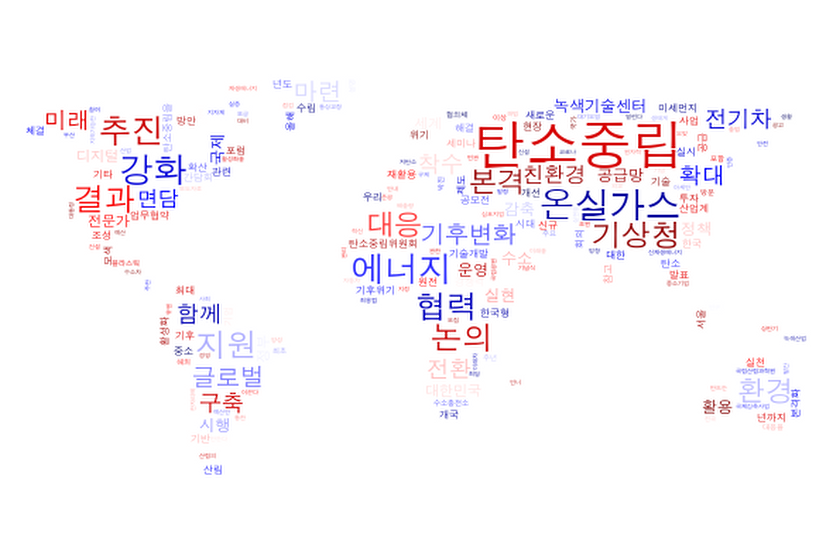

In [39]:
cand_mask=np.array(Image.open('test_2.jpg'))
most_common_words1 = Counter(word_count_sum).most_common(800) #상위 800개 단어를 워드클라우드로 작성
words = dict(most_common_words1)

#워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'AppleGothic.ttf', # 한글 글씨체 설정(Mac)
    background_color='white', # 배경색은 흰색으로 
    colormap='seismic', # 글씨색은 seismic(지진) 스타일로
    mask=cand_mask, # 워드클라우드 모양 설정(세계지도)
).generate_from_frequencies(words)

#사이즈 설정 및 출력
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='lanczos') #이미지 부드러움 정도
plt.axis('off') # 차트로 나오지 않게
plt.savefig('wordcloud.png') # 필요시 저장
plt.show()

# 결론

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  355k  100  355k    0     0  1617k      0 --:--:-- --:--:-- --:--:-- 1623k


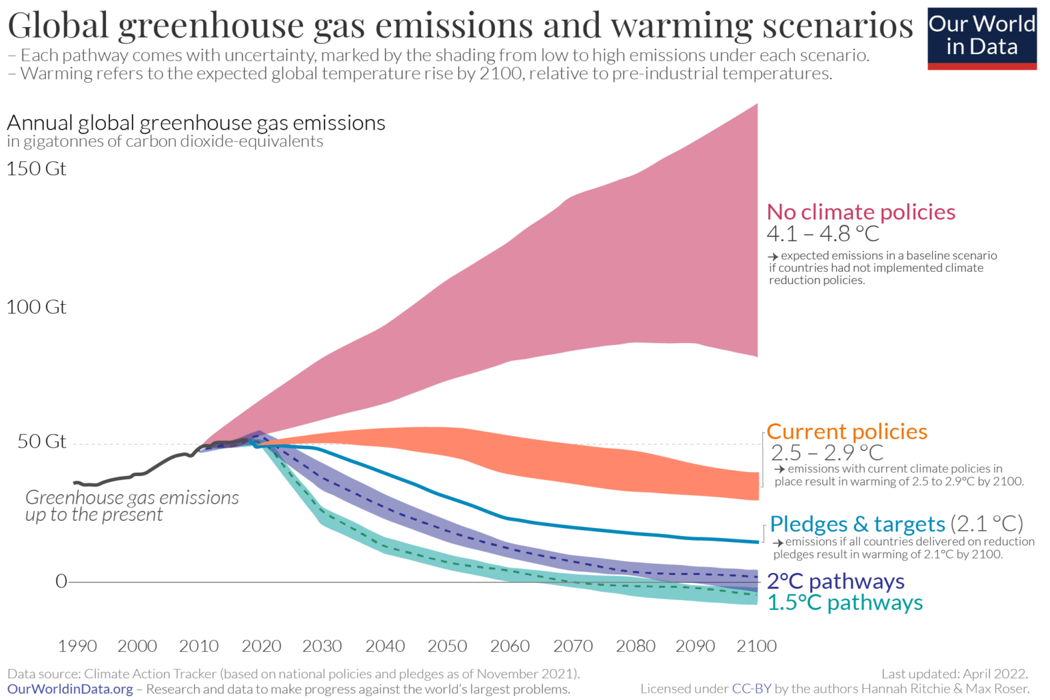

In [46]:
url = 'https://ourworldindata.org/uploads/2018/04/Greenhouse-gas-emission-scenarios-01-1536x1059.png'

os.system("curl " + url + " > conclusion.jpg")

# 저장 된 이미지 확인
curl_img = Image.open("./conclusion.jpg")
newsize = (1050,700)
curl_img.resize(newsize)

### 결론 : 돈이 안되더라도 기후 기술을 미래를 위해 꾸준히 개발해야 지구온난화가 적어질 것이다.